In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import missingno as msno
import re



In [2]:
titan = pd.read_csv('train.csv')

In [3]:
titan.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


# Definition of variables


#### survival = Survival	
- 0 = No, 1 = Yes

#### pclass   = Ticket class	
- 1 = 1st, 2 = 2nd, 3 = 3rd

#### sex	     = Sex	
#### Age	     = Age in years	
#### sibsp	 = # of siblings / spouses aboard the Titanic	
#### parch	 = # of parents / children aboard the Titanic	
#### ticket   =	Ticket number	
#### fare	 =  Passenger fare	
#### cabin	 = Cabin number	
#### embarked = Port of Embarkation	
- C = Cherbourg, Q = Queenstown, S = Southampton

In [4]:
titan.shape

(891, 12)

In [5]:
titan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
titan.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [7]:
titan.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [8]:
titan.index

RangeIndex(start=0, stop=891, step=1)

<BarContainer object of 12 artists>

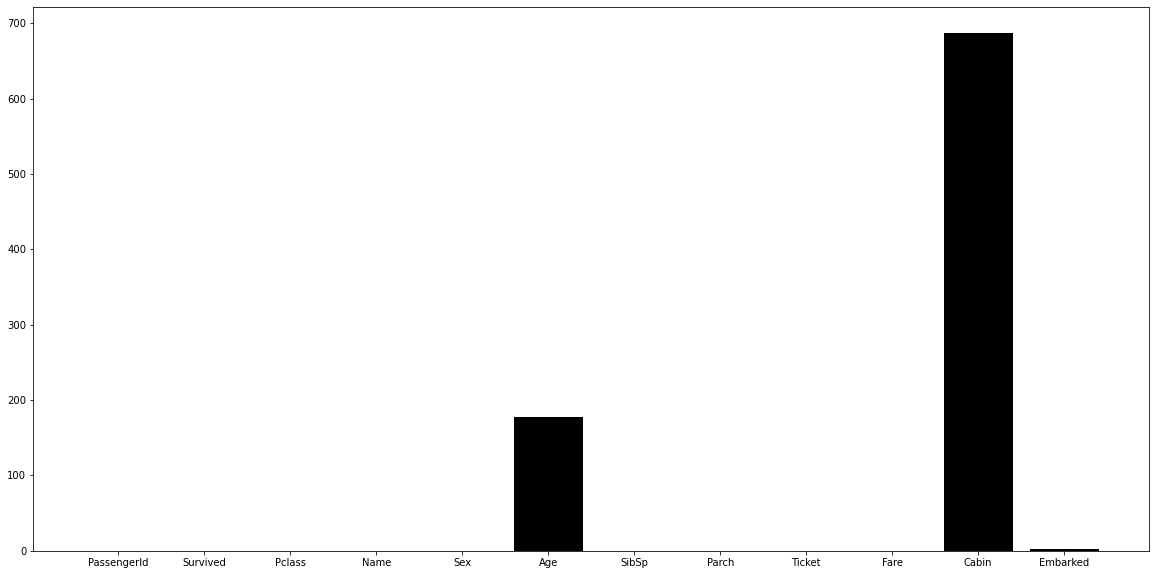

In [9]:
plt.figure(figsize=(20,10))
plt.bar(x = titan.columns ,height = titan.isnull().sum(),color = 'black')

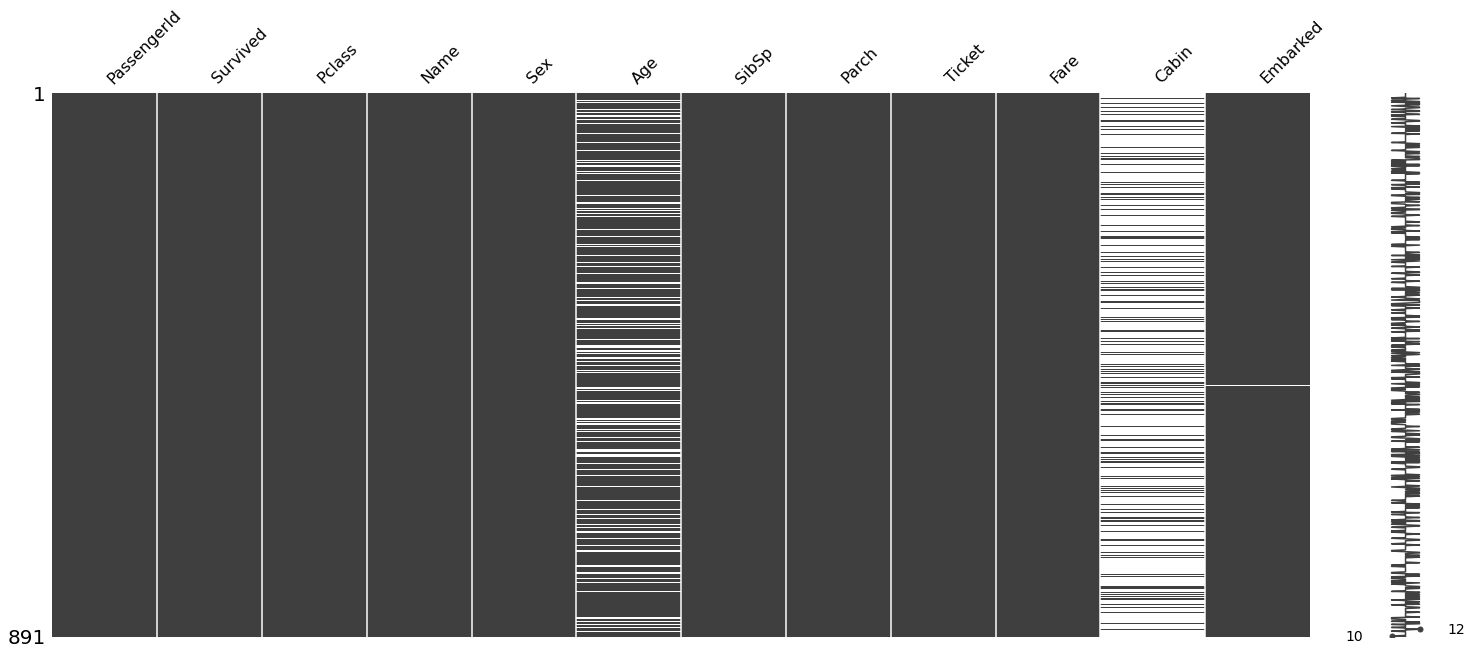

In [10]:
msno.matrix(titan.sample(891));

In [11]:
#Which column has the most NaN values? 
#Cabin
#How many cells in that column are empty?
#687

In [12]:
titan['Embarked'].isnull().index

RangeIndex(start=0, stop=891, step=1)

In [13]:
#Delete all rows where Embarked is empty
clean_titan = titan.drop(index = titan[titan['Embarked'].isnull()].index)
clean_titan.shape

(889, 12)

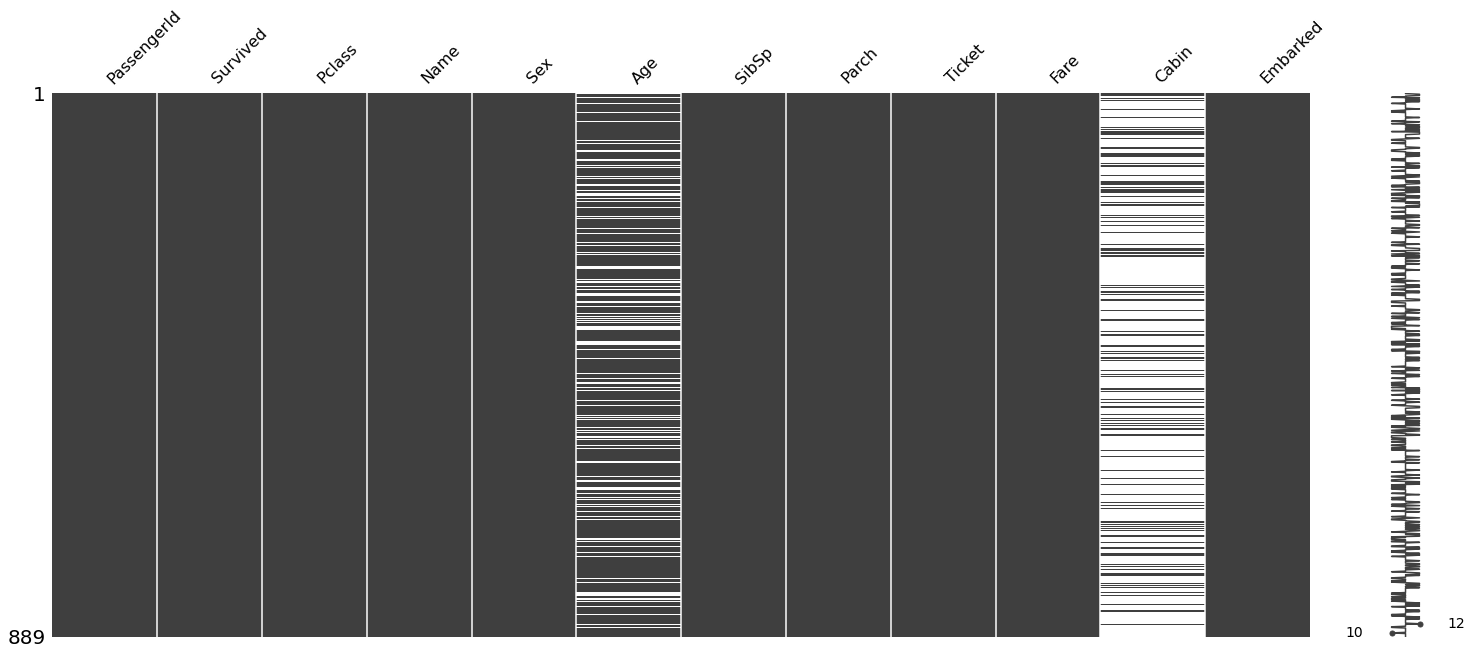

In [14]:
msno.matrix(clean_titan.sample(clean_titan.shape[0]));

In [15]:
#Fill all empty cabins with ¯\(ツ)/¯

clean_titan['Cabin'].fillna('¯\(ツ)/¯',inplace = True)

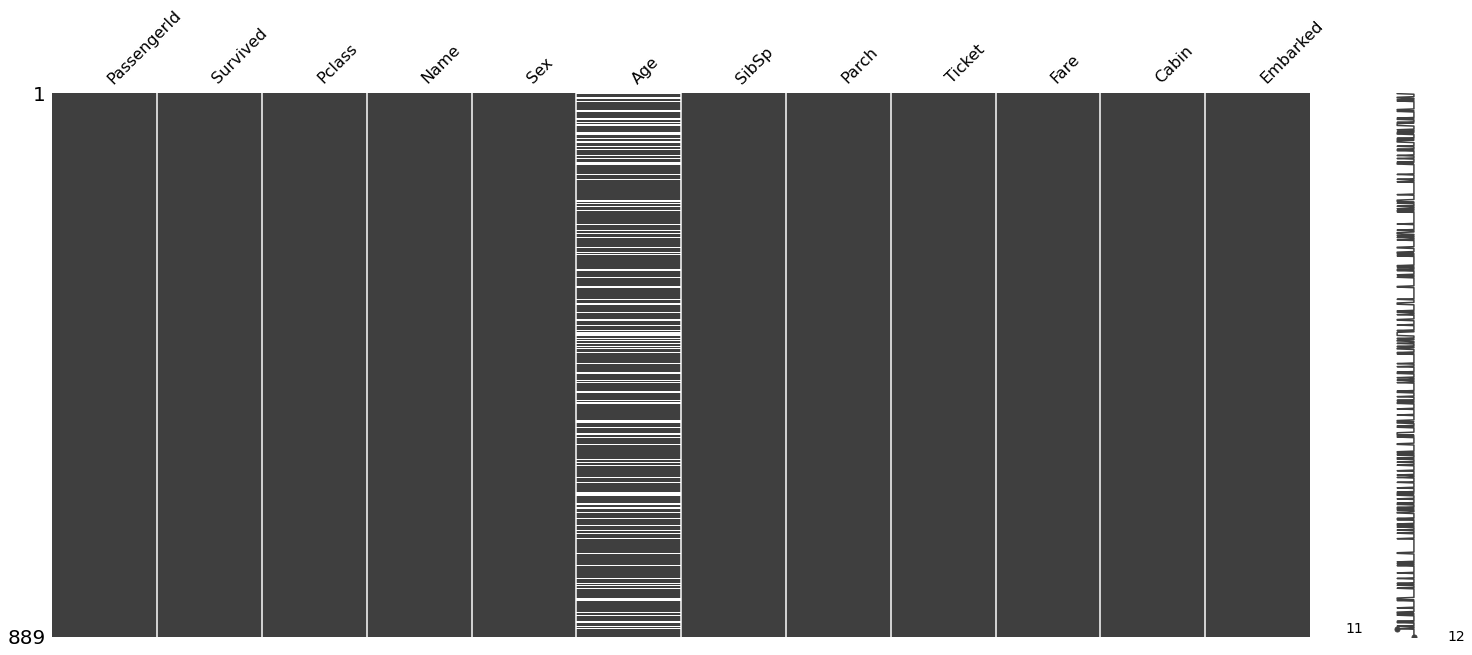

In [16]:
msno.matrix(clean_titan.sample(clean_titan.shape[0]));

In [17]:
#FamilyCount which will be the sum of those two columns
clean_titan['FamilyCount'] = clean_titan['SibSp']+clean_titan['Parch']

In [18]:
#IsReverend: 1 if they're a preacher, 0 if they're not.

clean_titan['IsReverend'] = clean_titan['Name'].str.contains('Rev.').astype(str)
clean_titan['IsReverend'] = clean_titan['IsReverend'].str.replace('True','1').replace('False','0')

In [19]:
#numerical embarked
num_embark = pd.get_dummies(clean_titan['Embarked'],prefix='Embarked_')
clean_titan = clean_titan.join(num_embark)

In [20]:
#numerical sex
num_sex =pd.get_dummies(clean_titan['Sex'],prefix='Sex_')
clean_titan = clean_titan.join(num_sex)

In [21]:
# Extract the title from everyone's name and create dummy columns
def get_title(col):
    title_list = []
    for x in col:
        title_1 = re.findall(', [A-z]+',x)
        title = title_1[0].lstrip(', ')
        title_list.append(title)
    clean_titan['title_name'] = title_list

get_title(clean_titan.Name)

num_title = pd.get_dummies(clean_titan['title_name'],prefix='Title_')


In [22]:
clean_titan

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilyCount,IsReverend,Embarked__C,Embarked__Q,Embarked__S,Sex__female,Sex__male,title_name
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,¯\(ツ)/¯,S,1,0,0,0,1,0,1,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,0,1,0,0,1,0,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,¯\(ツ)/¯,S,0,0,0,0,1,1,0,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,0,0,0,1,1,0,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,¯\(ツ)/¯,S,0,0,0,0,1,0,1,Mr
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,¯\(ツ)/¯,S,0,1,0,0,1,0,1,Rev
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,0,0,0,0,1,1,0,Miss
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,¯\(ツ)/¯,S,3,0,0,0,1,1,0,Miss
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,0,0,1,0,0,0,1,Mr


## EDA

In [23]:
clean_titan.nunique()

PassengerId    889
Survived         2
Pclass           3
Name           889
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         680
Fare           247
Cabin          147
Embarked         3
FamilyCount      9
IsReverend       2
Embarked__C      2
Embarked__Q      2
Embarked__S      2
Sex__female      2
Sex__male        2
title_name      17
dtype: int64

In [24]:
# What was the survival rate overall?
clean_titan.groupby('Survived')['PassengerId'].count()/889*100

# survival rate = 38.25%

Survived
0    61.754781
1    38.245219
Name: PassengerId, dtype: float64

In [25]:
# Which gender fared the worst? What was their survival rate?

clean_titan.groupby(['Sex'])['Survived'].value_counts(normalize=True)*100

Sex     Survived
female  1           74.038462
        0           25.961538
male    0           81.109185
        1           18.890815
Name: Survived, dtype: float64

clean_titan.groupby(['Sex','Survived'])['Survived'].value_counts()/889*100

In [26]:
#What was the survival rate for each Pclass?
clean_titan.groupby(['Pclass'])['Survived'].value_counts(normalize=True)*100

Pclass  Survived
1       1           62.616822
        0           37.383178
2       0           52.717391
        1           47.282609
3       0           75.763747
        1           24.236253
Name: Survived, dtype: float64

In [27]:
#Did any reverends survive? How many?

clean_titan.groupby(['IsReverend'])['Survived'].value_counts()

IsReverend  Survived
0           0           543
            1           340
1           0             6
Name: Survived, dtype: int64

In [28]:
#What is the survival rate for cabins marked ¯\(ツ)/¯

clean_titan.groupby(by = [clean_titan['Cabin']=='¯\(ツ)/¯'])['Survived'].value_counts(normalize=True)*100


Cabin  Survived
False  1           66.336634
       0           33.663366
True   0           70.014556
       1           29.985444
Name: Survived, dtype: float64

In [29]:
# What is the survival rate for people whose Age is empty?
clean_titan.groupby(by=[clean_titan['Age'].isnull()])['Survived'].value_counts(normalize=True)*100

Age    Survived
False  0           59.550562
       1           40.449438
True   0           70.621469
       1           29.378531
Name: Survived, dtype: float64

In [30]:
# What is the survival rate for each port of embarkation?
clean_titan.groupby(['Embarked'])['Survived'].value_counts(normalize=True)*100

Embarked  Survived
C         1           55.357143
          0           44.642857
Q         0           61.038961
          1           38.961039
S         0           66.304348
          1           33.695652
Name: Survived, dtype: float64

In [31]:
#What is the survival rate for children (under 12) in each Pclass?
clean_titan.groupby([clean_titan['Age']<12,'Pclass'])['Survived'].value_counts(normalize=True)*100

Age    Pclass  Survived
False  1       1            62.380952
               0            37.619048
       2       0            58.083832
               1            41.916168
       3       0            77.477477
               1            22.522523
True   1       1            75.000000
               0            25.000000
       2       1           100.000000
       3       0            59.574468
               1            40.425532
Name: Survived, dtype: float64

In [32]:
# Did the captain of the ship survive? Is he on the list?
clean_titan[(clean_titan['title_name']=='Capt')]

# captain didn't survive

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilyCount,IsReverend,Embarked__C,Embarked__Q,Embarked__S,Sex__female,Sex__male,title_name
745,746,0,1,"Crosby, Capt. Edward Gifford",male,70.0,1,1,WE/P 5735,71.0,B22,S,2,0,0,0,1,0,1,Capt


In [48]:
# Of all the people that died, who had the most expensive ticket? How much did it cost?
clean_titan.groupby(clean_titan['Survived'] == 0)['Fare'].max()


Survived
False    512.3292
True     263.0000
Name: Fare, dtype: float64

In [34]:
# Does having family on the boat help or hurt your chances of survival?

clean_titan.groupby(['FamilyCount'])['Survived'].value_counts(normalize=True)*100

FamilyCount  Survived
0            0            69.906542
             1            30.093458
1            1            55.279503
             0            44.720497
2            1            57.843137
             0            42.156863
3            1            72.413793
             0            27.586207
4            0            80.000000
             1            20.000000
5            0            86.363636
             1            13.636364
6            0            66.666667
             1            33.333333
7            0           100.000000
10           0           100.000000
Name: Survived, dtype: float64

### Fill NaN in age column

In [35]:
clean_titan[clean_titan['Survived'] == 1]['Age'].mean()

28.19329861111111

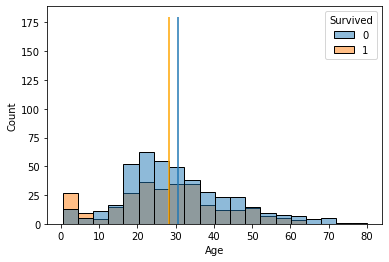

In [36]:
# plot histogram in age column 
sns.histplot(x='Age',hue='Survived',data=clean_titan)
plt.vlines(x=clean_titan[clean_titan['Survived'] == 1]['Age'].mean(),data= clean_titan,ymin=0,ymax=180,color='orange')
plt.vlines(x=clean_titan[clean_titan['Survived'] == 0]['Age'].mean(),data= clean_titan,ymin=0,ymax=180,color='tab:blue')

In [37]:
#the skewness of both survived and not survived define as approximately symmetric
clean_titan.groupby('Survived')['Age'].skew()

Survived
0    0.585584
1    0.173955
Name: Age, dtype: float64

In [38]:
round(clean_titan['Age'].mean(),0)

30.0

In [39]:
#fill NaN age

clean_titan['Age'] = clean_titan['Age'].fillna(round(clean_titan['Age'].mean(),0))

In [40]:
#clean_titan.Age.astype(int)

In [41]:
# Ranging age

def rang(var):
    old = []
    for i in var:
        if i >= 60:
            old.append('Old')
        elif i >= 30 : 
            old.append('Middle_adult')
        elif i >= 20:
            old.append('Adult')
        elif i >= 3:
            old.append('Young')
        elif i >= 0:
            old.append('Baby')
        else:
            old.append('Not_defined')
    clean_titan['Age_range'] = old
    
rang(clean_titan.Age)


## Visualization

<AxesSubplot:>

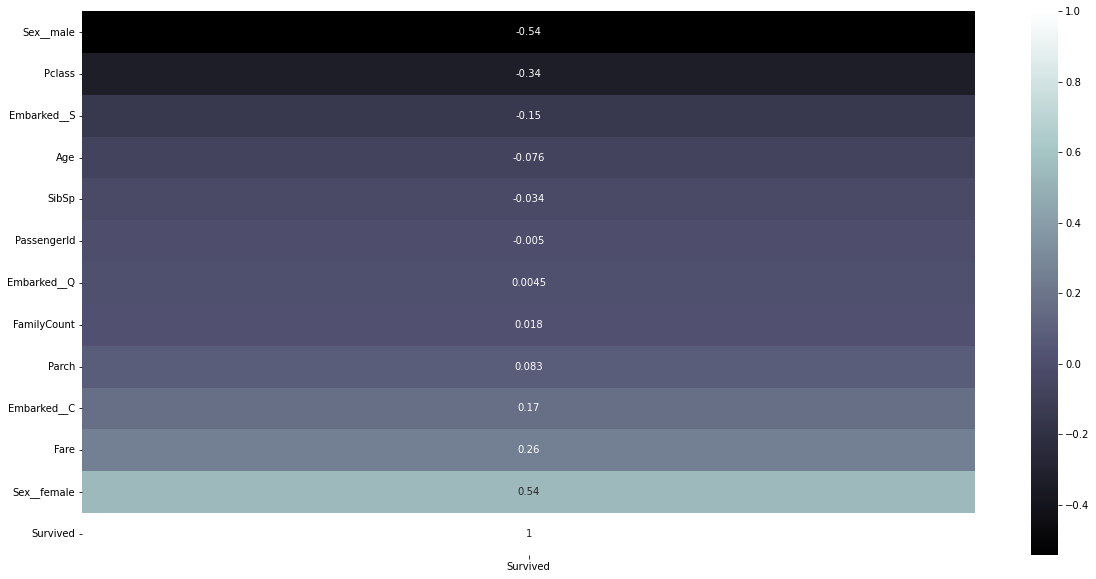

In [42]:
plt.figure(figsize=(20,10))
sns.heatmap(pd.DataFrame(clean_titan.corr()['Survived'].sort_values()),annot=True,cmap='bone')

#### The correlation of all variables and survived has shown in the figure. The 'Sex' column either male or female seem to represent the high correlated with survived. Followed by Pclass, Fare, Age, and FamilyCount  which have the correlated to 'Survived' respectively.

<Figure size 1440x720 with 0 Axes>

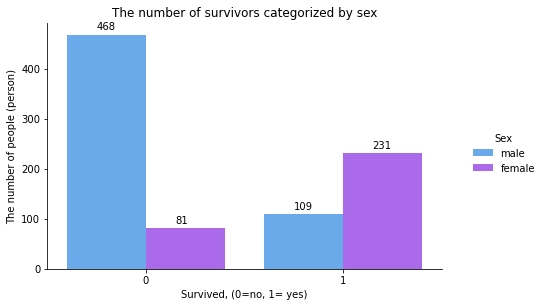

In [43]:
#fig,ax = plt.subplots(figsize=(15, 10))
plt.figure(figsize=(20,10))
# top left plot
g= sns.catplot(data=clean_titan,kind='count',x ='Survived',hue='Sex',palette='cool')
plt.title('The number of survivors categorized by sex')
plt.ylabel('The number of people (person)')
plt.xlabel('Survived, (0=no, 1= yes)')
g.fig.set(figheight=4,figwidth=8,)
for p in g.ax.patches:
    txt = str(p.get_height().round(2))# + '%'
    txt_x = p.get_x() + 0.15
    txt_y = p.get_height() + 10
    g.ax.text(txt_x,txt_y,txt);







### The probability of female to survive is 25.9% and for male is only 9.1%

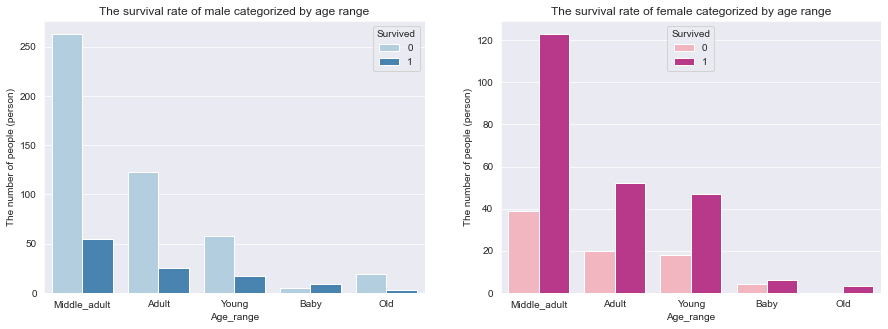

In [44]:
sns.set_style('darkgrid')
fig, axes = plt.subplots(1,2,figsize=(15, 5))
sns.countplot(x=clean_titan[clean_titan['Sex']=='male']['Age_range'],hue='Survived' ,data = clean_titan,palette = 'Blues',ax = axes[0],order=clean_titan[(clean_titan['Sex']=='male')& (clean_titan['Survived'] ==1)]['Age_range'].value_counts().index)
sns.countplot(x=clean_titan[clean_titan['Sex']=='female']['Age_range'],hue='Survived' ,data = clean_titan,palette = 'RdPu',ax = axes[1])
axes[1].set_title('The survival rate of female categorized by age range')
axes[0].set_title('The survival rate of male categorized by age range');
axes[0].set_ylabel('The number of people (person)')
axes[1].set_ylabel('The number of people (person)');


### Females in every age range seem to have a better chance to survive. But for a male, the baby will be the first priority to help and will survive, unlike an old man who will have a high chance of not surviving.

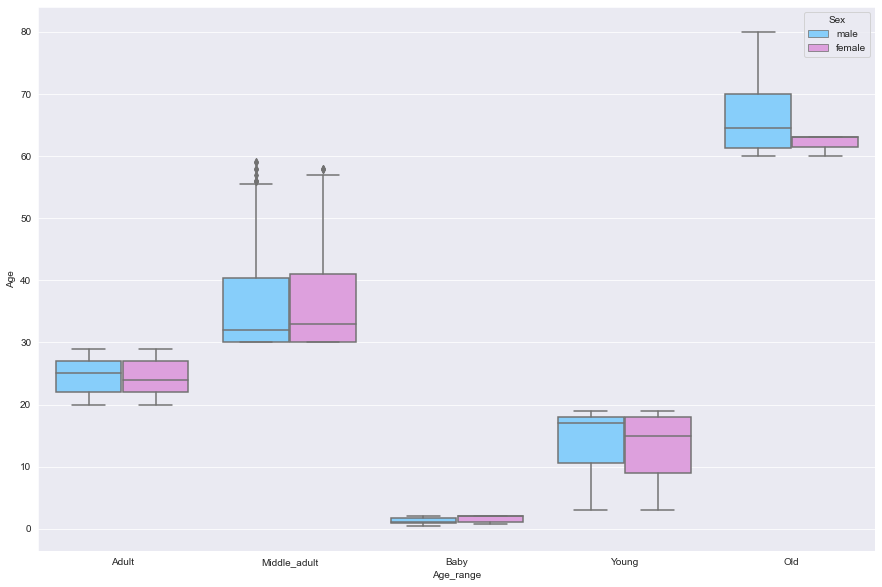

In [45]:
plt.figure(figsize=(15,10))
sns.boxplot(y='Age',x='Age_range',hue='Sex',data = clean_titan,palette=['lightskyblue','plum'],saturation=1);

### The average age in each age range for males and females seems to be close to each other.

/var/folders/78/4zcxg1p56xqd59gs1f96svr40000gn/T/ipykernel_859/2016781287.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  family_surv_in_their_group['Survived_%'][15] = 0


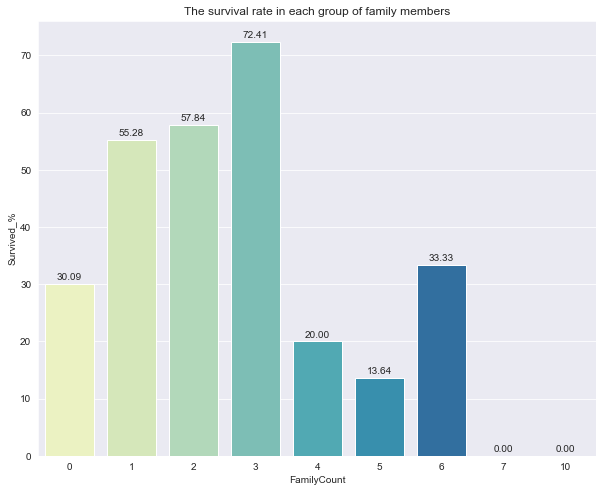

In [46]:
family_surv_in_their_group = pd.DataFrame(clean_titan.groupby(['FamilyCount'])['Survived'].value_counts(normalize=True)*100)
family_surv_in_their_group.columns = ['Survived_%']
family_surv_in_their_group.reset_index(inplace = True)
family_surv_in_their_group = family_surv_in_their_group[(family_surv_in_their_group['Survived']) |( family_surv_in_their_group['FamilyCount'] == 7) | (family_surv_in_their_group['FamilyCount'] == 10)]
family_surv_in_their_group['Survived_%'][14] = 0
family_surv_in_their_group['Survived_%'][15] = 0
# ---------- plot -----------------
fig, ax =plt.subplots(figsize= (10,8))
g = sns.barplot(data=family_surv_in_their_group,x='FamilyCount',y='Survived_%',palette = 'YlGnBu')
ax.set_title('The survival rate in each group of family members')
for i in g.containers:
    g.bar_label(i,padding =2,fmt = '%.2f')

### From the figure in each number of families, it shows that the group of people with no family (zero) will have a percentage of surviving only of 30.0935%. And with the increase in the number of families, the percentage will grow, as in the family of 3, which has the percentage to survive up to 72.4138%. However, the percentage of surviving tends to decrease if the number of families is greater than 3. This means that in an emergency situation, the group composed of 4 (including themselves) will be the best to survive.

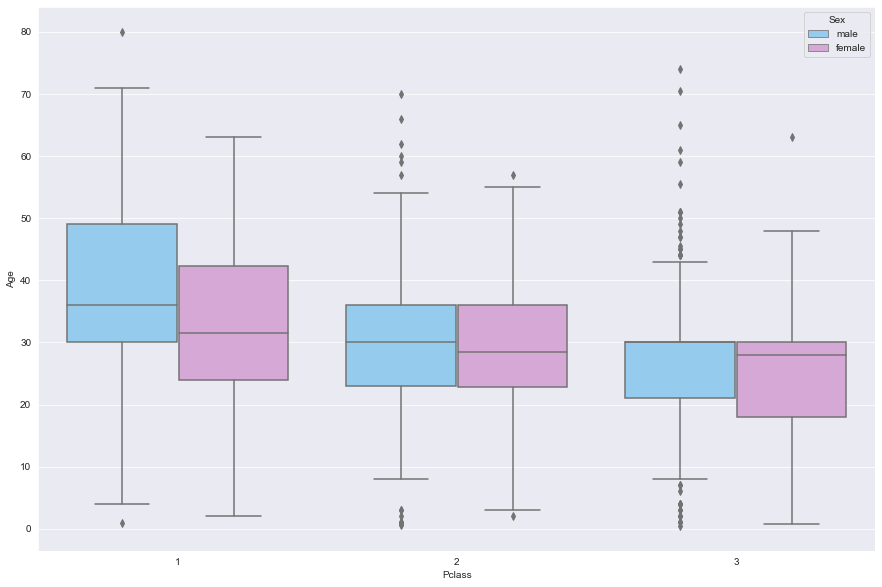

In [47]:
plt.figure(figsize=(15,10))
sns.boxplot(y='Age',x='Pclass',hue='Sex',data = clean_titan,palette=['lightskyblue','plum']);

### This show the average of age in each Pclass for male and female. The higher in class, also the higher in age. The older are more afforable for both male and female.

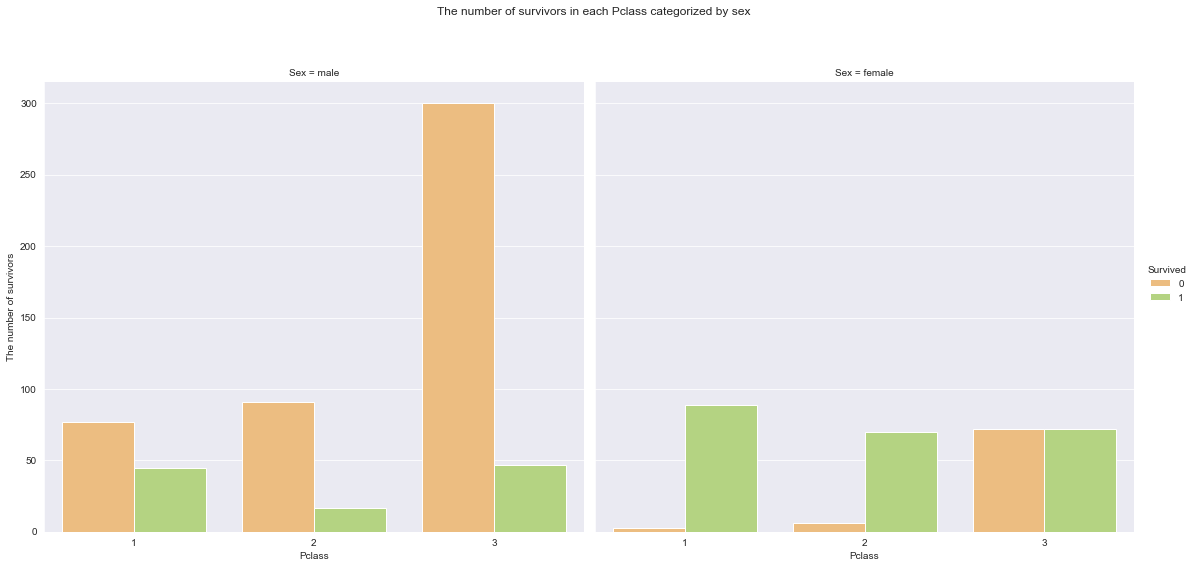

In [48]:
a = sns.catplot(data=clean_titan,kind='count',x ='Pclass' ,col = 'Sex',hue = 'Survived',palette = 'RdYlGn',height=8).set(ylabel='The number of survivors');
#,title='The number of survivors in each Pclass categorized by sex'
a.fig.subplots_adjust(top=0.85) # adjust the Figure in rp
a.fig.suptitle('The number of survivors in each Pclass categorized by sex');

### For both male and female, the class seem to be the one of variable to survive. 

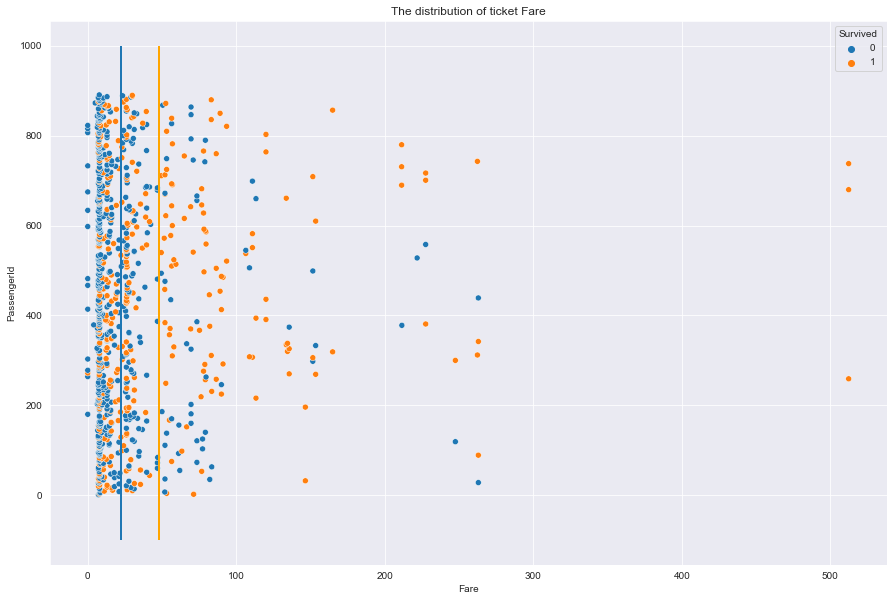

In [49]:
#high fare high escaspe?
plt.figure(figsize=(15,10))
sns.scatterplot(x ='Fare',y='PassengerId',hue = 'Survived', data = clean_titan)
plt.vlines(x=clean_titan.groupby('Survived')['Fare'].mean()[1],ymin=-100,ymax=1000,color='orange',lw =2)
plt.vlines(x=clean_titan.groupby('Survived')['Fare'].mean()[0],ymin=-100,ymax=1000,color='tab:blue',lw =2)
plt.title('The distribution of ticket Fare');


In [50]:

# number of people who buy fare higher than mean fare of who survive
a = clean_titan[clean_titan['Fare']>clean_titan.groupby('Survived')['Fare'].mean()[1]].count()[0]
# number of people who buy fare higher than mean fare of who survive , and also they survive
b = clean_titan[(clean_titan['Survived'] == 1)& (clean_titan['Fare']> clean_titan.groupby('Survived')['Fare'].mean()[1])].count()[0]
b/a

0.6728395061728395

### The survivors that buy a ticket with the high fare than average gonna have the probability to survive 67.28%

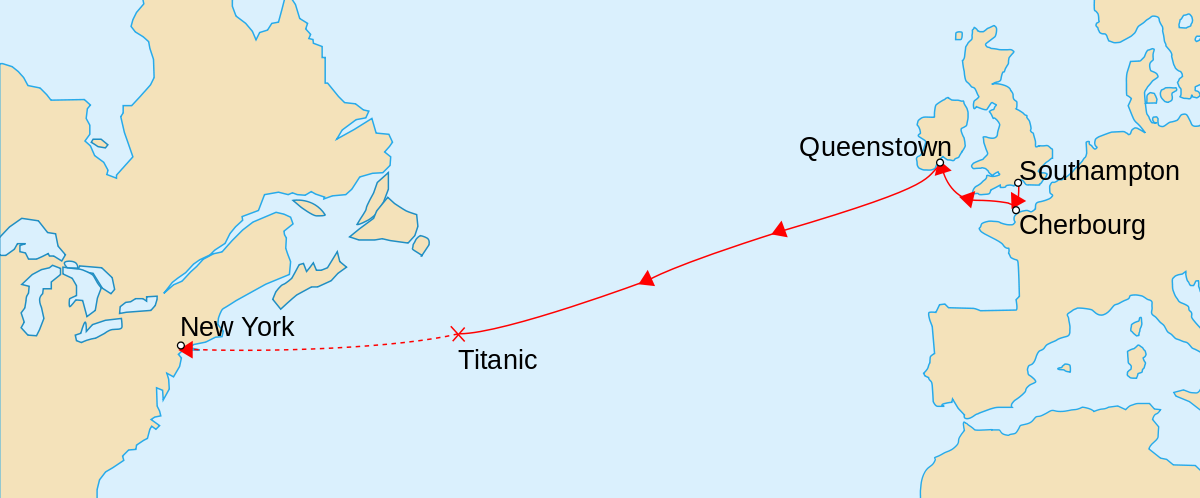

<Figure size 1440x720 with 0 Axes>

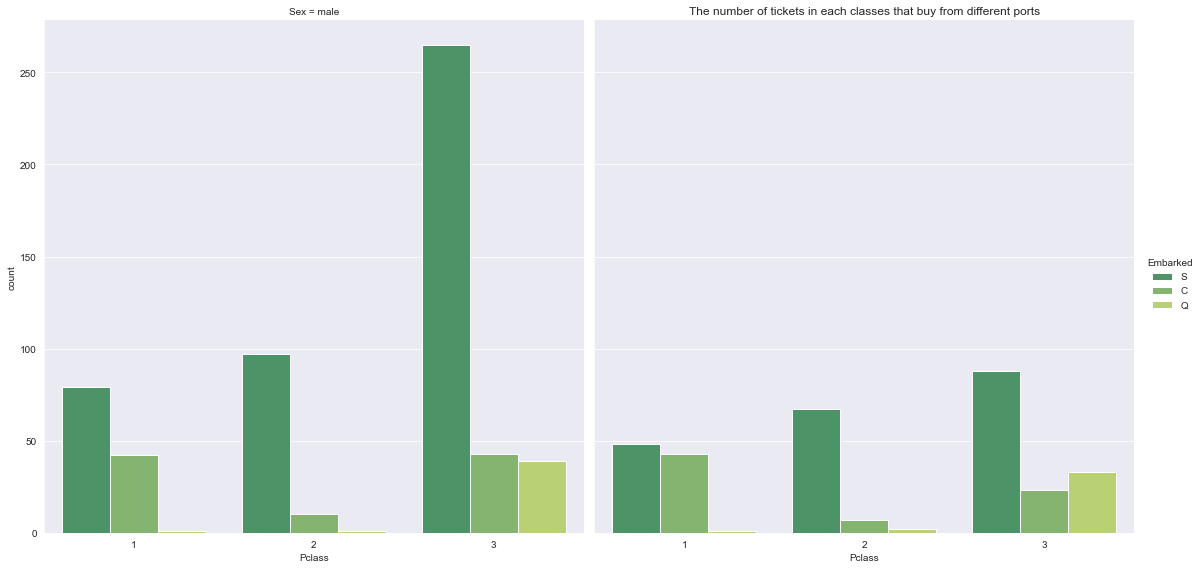

In [58]:
# embark vs Pclass
plt.figure(figsize=(20,10))
sns.catplot(data= clean_titan,x='Pclass',hue='Embarked',kind='count',palette='summer',height=8,col='Sex')
plt.title('The number of tickets in each classes that buy from different ports');

### Assumption : Most of the 1st class tickets had been sold before the ship arrived at Queenstown, so the people who embarked at Queenstown have been forced to buy 3rd class tickets.